## Stock Market Forecasting: ##
Stock market or share market is the aggregation of buyers and sellers of stocks (shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment in the stock market is most often done via stockbrokerages and electronic trading platforms. Investment is usually made with an investment strategy in mind.

### Problem Statement: ### 
The task of stock prediction has always been a challenging
problem for statistics experts. The main reason
behind this prediction is buying stocks that are likely to
increase in price and then selling stocks that are probably
to fall. Generally, there are two ways for stock market prediction.
-> First:- Fundamental analysis is one of them and relies on a
company's technique and fundamental information like market position, expenses and annual growth rates.
->second:-
Technical analysis method, which concentrates on
previous stock prices and values.


### Datasets:  ###
 1. Google
 2. Microsoft
 3. IBM
 4. Amazon
  

### Approach: ###
We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our datasets. Then we forecast the stock prices using deep learning concepts.

## 1. Analysis And Visualization: ##

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
google = pd.read_csv('D:\Stock_Market_Prediction\data\GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [3]:
microsoft = pd.read_csv('D:\Stock_Market_Prediction\data\MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
microsoft.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


In [4]:
amazon = pd.read_csv('D:\Stock_Market_Prediction\data\AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [5]:
ibm = pd.read_csv('D:\Stock_Market_Prediction\data\IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
ibm.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [6]:
google.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


In [7]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [9]:
google.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [10]:
microsoft.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,36.496817,36.827903,36.173190,36.513412,5.161762e+07
std,14.683337,14.742483,14.620057,14.694656,3.114958e+07
min,15.200000,15.620000,14.870000,15.150000,7.425603e+06
25%,26.785000,27.045000,26.535000,26.835000,3.136557e+07
50%,29.990000,30.230000,29.780000,30.000000,4.617529e+07
75%,44.545000,44.980000,44.090000,44.400000,6.322291e+07
max,87.120000,87.500000,86.230000,86.850000,5.910786e+08


Also same for the Microsoft dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [11]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [12]:
microsoft.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [13]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [14]:
amazon.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08


Also same for the Amazon dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [15]:
amazon.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [16]:
amazon.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [17]:
ibm.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


But for the IBM dataset, we can see all the value is nearly close to the mean.

In [18]:
ibm.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [19]:
ibm.isna().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [20]:
ibm.dropna(inplace=True)


In [21]:
ibm.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

### Correlation: ###
->There is a very high correlation between "Open" and "Close".

In [22]:
google[['Open', 'Close']].corr()

,Open,Close
Open,1.000000,0.999742
Close,0.999742,1.000000


In [23]:
amazon[['Open', 'Close']].corr()

,Open,Close
Open,1.000000,0.999833
Close,0.999833,1.000000


In [24]:
ibm[['Open', 'Close']].corr()

,Open,Close
Open,1.00000,0.99928
Close,0.99928,1.00000


In [25]:
microsoft[['Open', 'Close']].corr()

,Open,Close
Open,1.000000,0.999565
Close,0.999565,1.000000


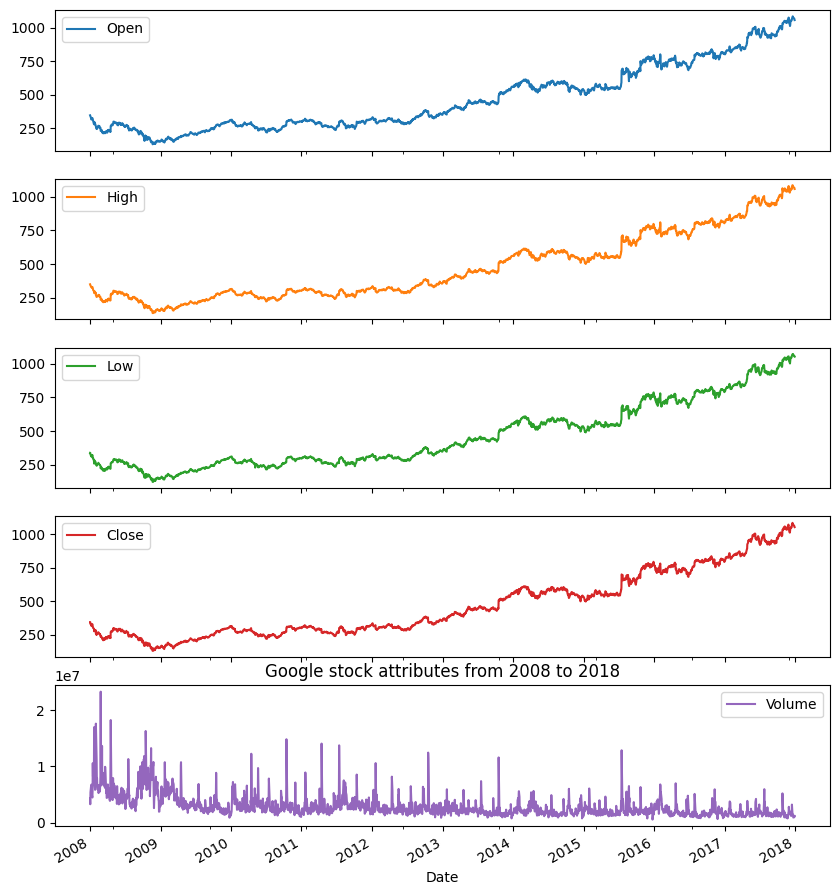

In [26]:
google['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

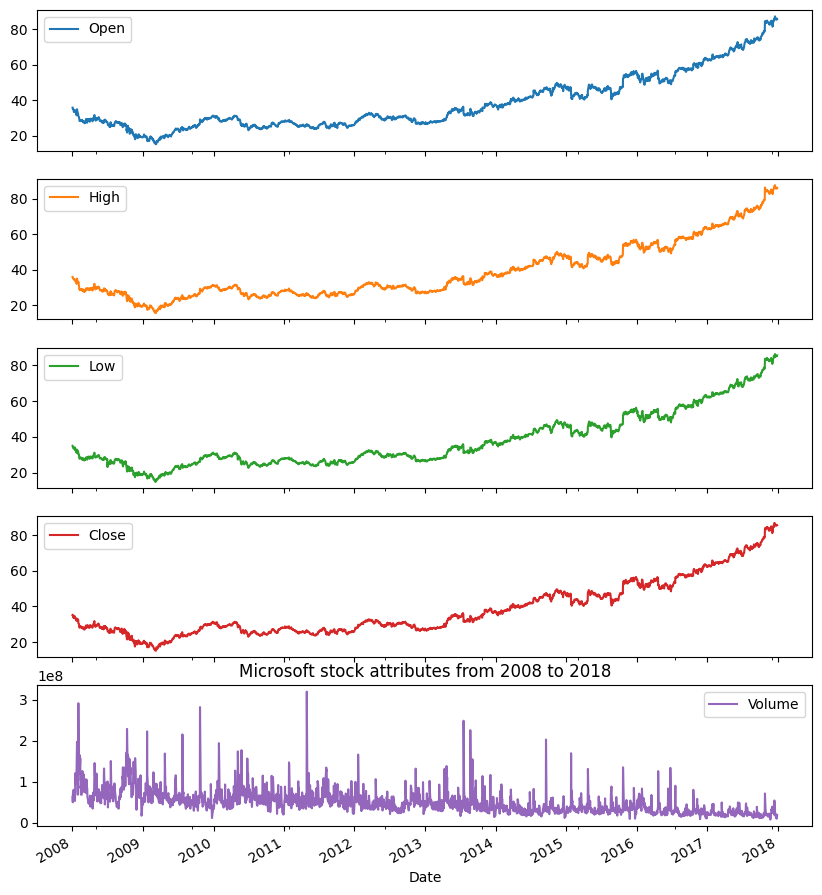

In [27]:
microsoft['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Microsoft stock attributes from 2008 to 2018')
plt.show()

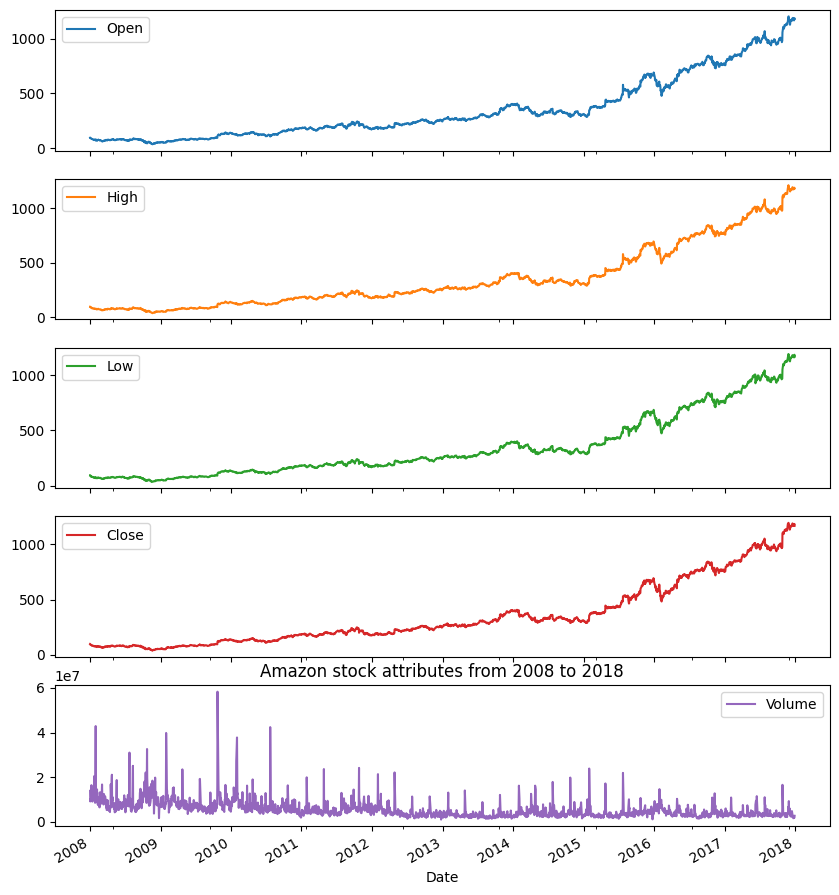

In [28]:
amazon['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 2008 to 2018')
plt.show()

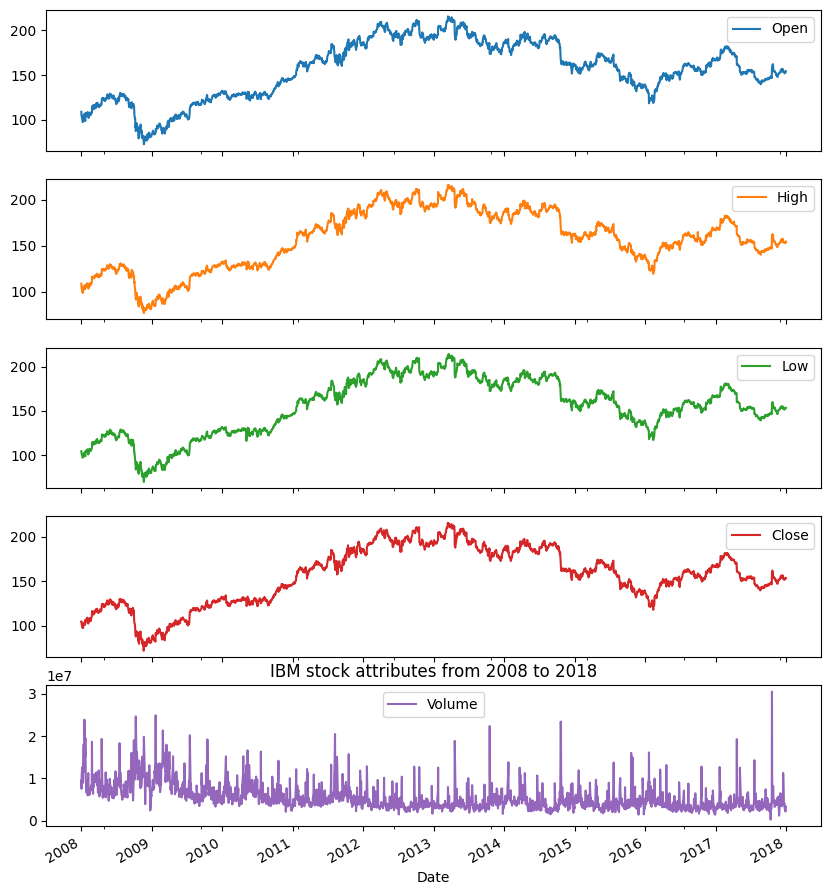

In [29]:
ibm['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('IBM stock attributes from 2008 to 2018')
plt.show()

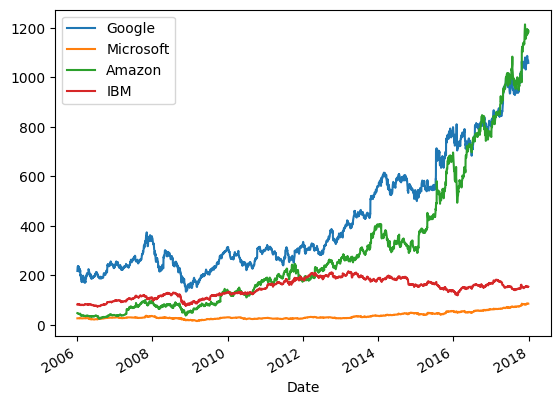

In [30]:
google.High.plot()
microsoft.High.plot()
amazon.High.plot()
ibm.High.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()

As we can see here Microsoft's "High" value is very slowly increasing straight line. IBM's "High" value and Amazon's "High" value started from the approx same stage, even Amazon's "High" value was a bit lower but after 2012 Amazon's "High" value started to exponentially increase and slight drop for IBM's "High" value. Since 2016 there is a high fight going between Google's "High" value and Amazon's "High" value at 2018 Amazon's "High" value also beat Google's "High" value.

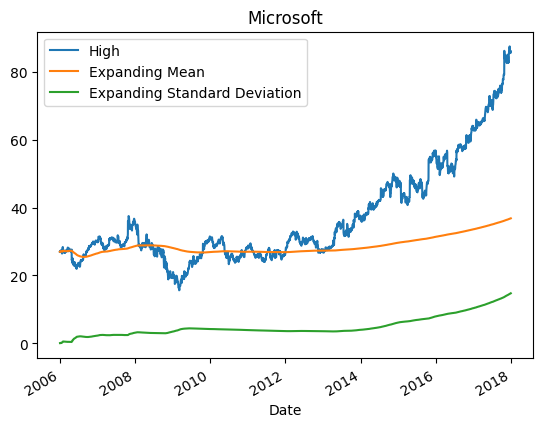

In [31]:
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Microsoft')
plt.show()

->In Microsoft data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss.

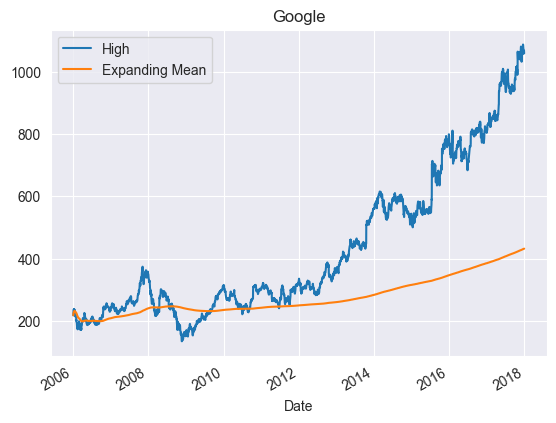

In [39]:
google_mean = google.High.expanding().mean()
google.High.plot()
google_mean.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

->Same for Google data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. But it was not an as huge loss as Amazon.

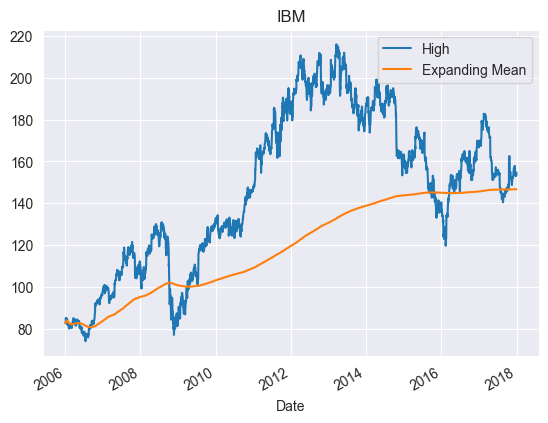

In [40]:
ibm_mean = ibm.High.expanding().mean()
ibm.High.plot()
ibm_mean.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('IBM')
plt.show()

->Same for IBM data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. And after 2013 again a drop then in 2016 there was a huge loss but after that, they were doing well. After just some profit again in between 2017, there was another drop.

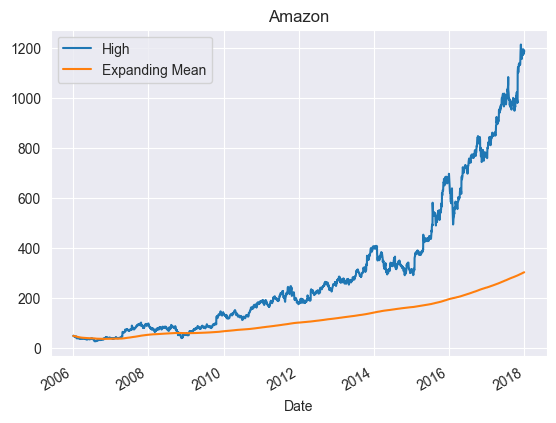

In [41]:
amazon_mean = amazon.High.expanding().mean()
amazon.High.plot()
amazon_mean.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Amazon')
plt.show()

->For Amazon's "High" value the case is different they also face loss in 2009 but for a very little margin. And after that their growth is in exponential order.

## 2.Stock Price Forecasting:

### Time Series Forecasting: ##
Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.


### LSTM Model: ###
LSTMs (Long Short-Term Memory networks) are a type of RNNs and provide an advantage in learning from sequence data which makes forecasting stock prices well-suited. Temporal dependencies and patterns in historical price data. Since the prices of the stock market have patterns and changes, if we feed them to LSTM with past and technical indicators values, it can predict to trading times. The trained model can then be used to predict what future stock price depending on those learned patterns.

<!-- <img src='D:\Stock_Market_Prediction\data\LSTM.png' /> -->


In [42]:
filepath = 'D:\Stock_Market_Prediction\data\AMZN_2006-01-01_to_2018-01-01.csv'
data_amazon = pd.read_csv(filepath)
data_amazon = data_amazon.sort_values('Date')
data_amazon.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


->Analysis of stock prices by time for all datasets.

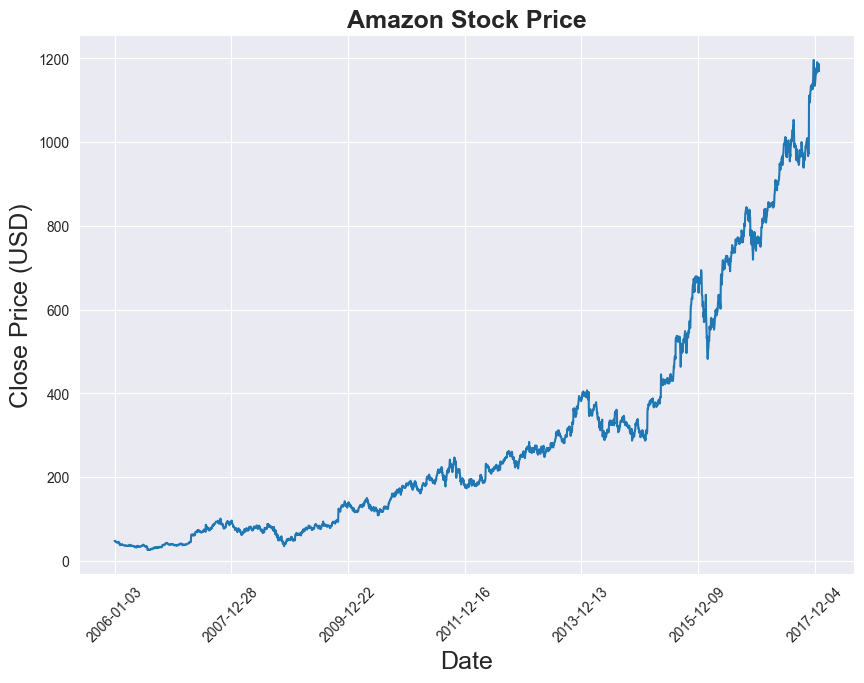

In [43]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,7))
plt.plot(data_amazon[['Close']])
plt.xticks(range(0,data_amazon.shape[0],500),data_amazon['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [44]:
filepath = 'D:\Stock_Market_Prediction\data\GOOGL_2006-01-01_to_2018-01-01.csv'
data_google = pd.read_csv(filepath)
data_google = data_google.sort_values('Date')
data_google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


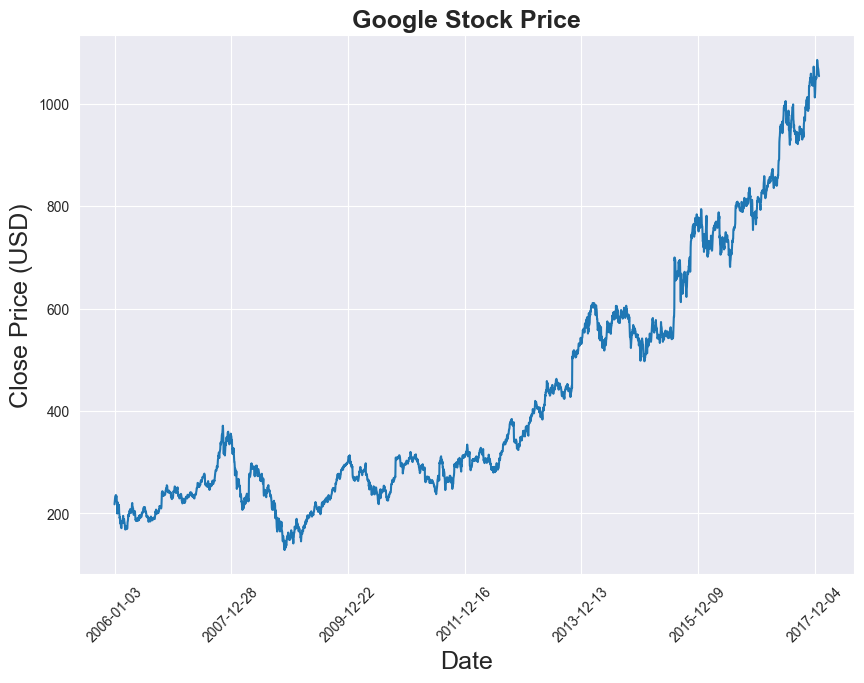

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,7))
plt.plot(data_google[['Close']])
plt.xticks(range(0,data_google.shape[0],500),data_google['Date'].loc[::500],rotation=45)
plt.title("Google Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [48]:
filepath = 'D:\Stock_Market_Prediction\data\IBM_2006-01-01_to_2018-01-01.csv'
data_ibm = pd.read_csv(filepath)
data_ibm = data_ibm.sort_values('Date')
data_ibm.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [49]:
data_ibm.dropna(inplace=True)

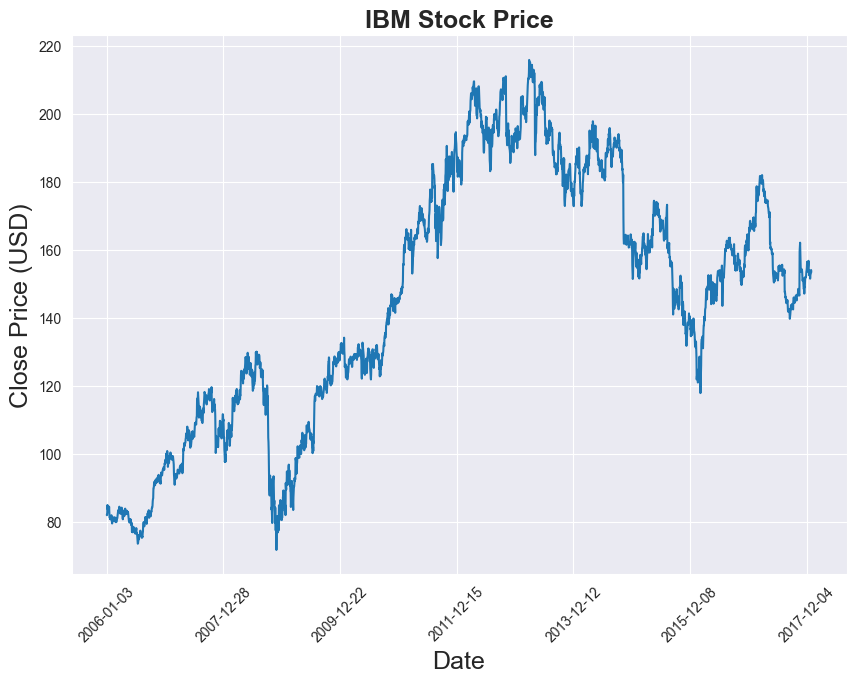

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,7))
plt.plot(data_ibm[['Close']])
plt.xticks(range(0,data_ibm.shape[0],500),data_ibm['Date'].loc[::500],rotation=45)
plt.title("IBM Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [52]:
filepath = 'D:\Stock_Market_Prediction\data\MSFT_2006-01-01_to_2018-01-01.csv'
data_microsoft = pd.read_csv(filepath)
data_microsoft = data_microsoft.sort_values('Date')
data_microsoft.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


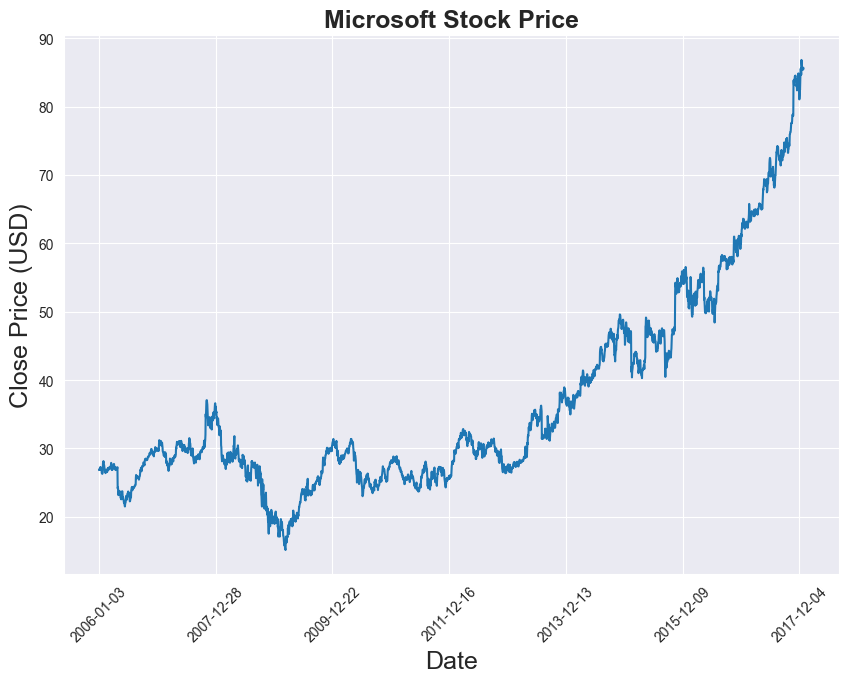

In [53]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,7))
plt.plot(data_microsoft[['Close']])
plt.xticks(range(0,data_microsoft.shape[0],500),data_microsoft['Date'].loc[::500],rotation=45)
plt.title("Microsoft Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()